In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
heart = pd.read_csv('./heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [75]:
heart.shape

(918, 12)

In [76]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

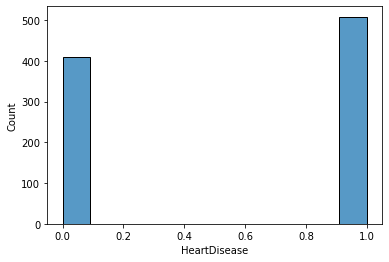

In [5]:
# is our data disbalance?
sns.histplot(heart['HeartDisease'])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

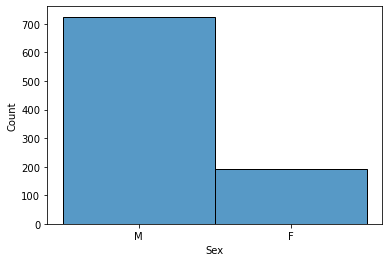

In [6]:
sns.histplot(heart['Sex'])

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

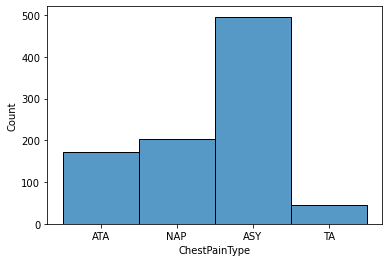

In [7]:
sns.histplot(heart['ChestPainType'])

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

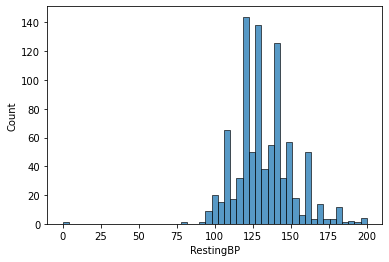

In [8]:
sns.histplot(heart['RestingBP'])

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

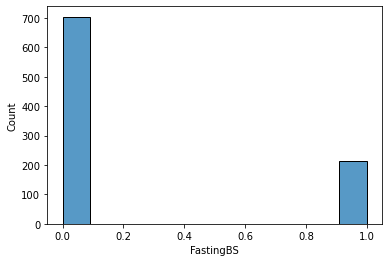

In [9]:
sns.histplot(heart['FastingBS'])

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

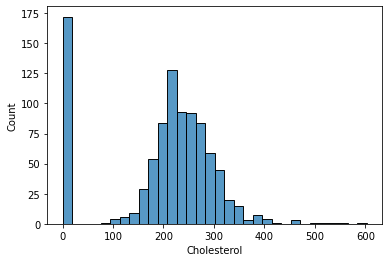

In [10]:
sns.histplot(heart['Cholesterol'])

In [91]:
# In some varables, zeros can represent missing values, so, i'll treat them as nan
heart['RestingBP'] = heart['RestingBP'].replace(0, heart['RestingBP'].median())
heart['Cholesterol'] = heart['Cholesterol'].replace(0, heart['Cholesterol'].median())

<AxesSubplot:>

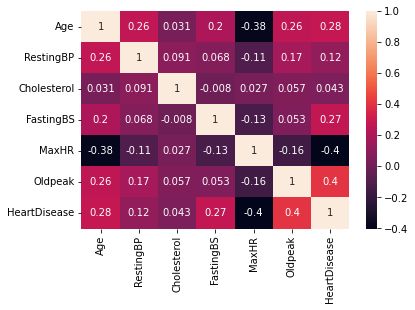

In [79]:
# let's going to use heatmap plot to see correlaction between features and target variable
sns.heatmap(heart.corr(), annot = True)

## exploring categorical data with target variable

In [67]:
heart.select_dtypes('object').columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [92]:
# Sex
heart.groupby(['Sex'])['HeartDisease'].mean()

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='Sex'>

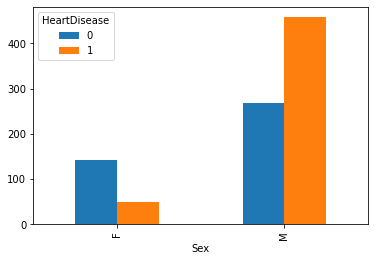

In [77]:
pd.crosstab(heart['Sex'], heart['HeartDisease']).plot.bar()

even the fact that there are more men in the dataset, men have more likely to suffer heart  than women, regardeing to the study, exactly: 

In [81]:
0.631/0.259

2.436293436293436

In [68]:
# chest pain
heart.groupby(['ChestPainType'])['HeartDisease'].mean()

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64

In [20]:
heart.groupby('ChestPainType')['HeartDisease'].value_counts().unstack()

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


<AxesSubplot:xlabel='ChestPainType'>

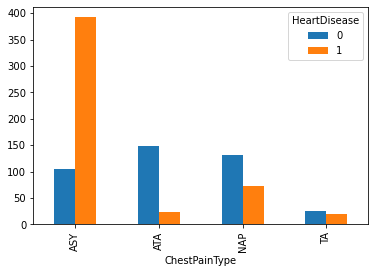

In [69]:
pd.crosstab(heart['ChestPainType'], heart['HeartDisease']).plot.bar()

As we can see, asymptomatic people have suffered more heart diseases, beacause they are no aware that they can have one and they can't  avoid it. Unlike to people that know o feel .

In [82]:
# RestingECG
heart.groupby('RestingECG')['HeartDisease'].mean()

RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='RestingECG'>

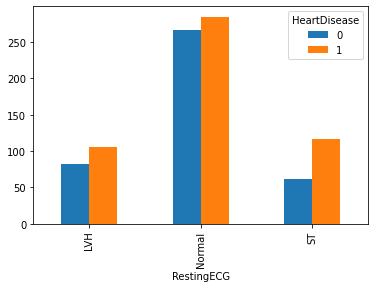

In [84]:
pd.crosstab(heart['RestingECG'], heart['HeartDisease']).plot.bar()

people with wave abnormality when they are resting are more likely to have heart disease.

In [109]:
# Exercise induced angina
heart.groupby('ExerciseAngina')['HeartDisease'].mean()

ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='ExerciseAngina'>

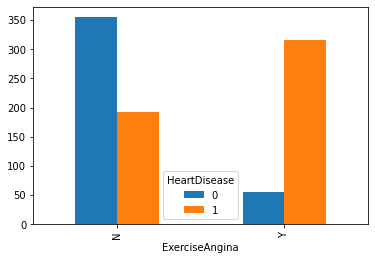

In [110]:
pd.crosstab(heart['ExerciseAngina'], heart['HeartDisease']).plot.bar()

There is a big relation between people with Angina induced by exercise and people who suffered heart disease.

Also, researching i found a relation between angina induced by exercise and chest pain.

In [14]:
heart.groupby('ExerciseAngina')['ChestPainType'].value_counts()

ExerciseAngina  ChestPainType
N               ASY              199
                ATA              156
                NAP              152
                TA                40
Y               ASY              297
                NAP               51
                ATA               17
                TA                 6
Name: ChestPainType, dtype: int64

people who have angina induced by exercise tend to be asymptomatic when we talk about chest pain.

In [16]:
# ST_Slope
heart.groupby(['ST_Slope'])['HeartDisease'].mean()

ST_Slope
Down    0.777778
Flat    0.828261
Up      0.197468
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='ST_Slope'>

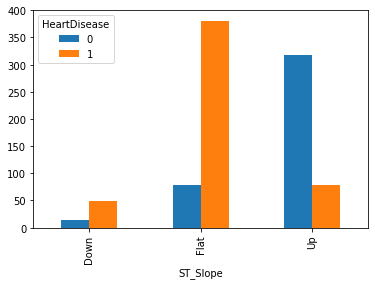

In [18]:
pd.crosstab(heart['ST_Slope'], heart['HeartDisease']).plot.bar()

the values in this feature represent the direction of the slope, when the slope is up represent the normal direction, but, a flat or down slope represent more probability to have heart diseases.

In [93]:
# Dropping values with low correlation
heart = heart.drop(['Cholesterol', 'FastingBS'], axis = 1)

## Transforming categorical data

In [94]:
heart = pd.get_dummies(heart, drop_first = True)
heart.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,122,0.0,0,1,0,1,0,1,0,0,0,1


In [95]:
# separing target variable from dataset
x = heart.drop('HeartDisease', axis = 1)
y = heart['HeartDisease']xz

In [96]:
# scaling data
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
x = qt.fit_transform(x)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (918). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


## Creating a model

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

stk = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 100)
for train_index, test_index in stk.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [103]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(max_iter = 1000)
regression.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
print('Accuracy model: ', regression.score(x_train, y_train))
print('Accuracy prediction: ', accuracy_score(regression.predict(x_test), y_test))

Accuracy model:  0.8571428571428571
Accuracy prediction:  0.8524590163934426


<AxesSubplot:>

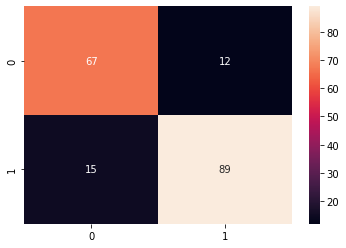

In [105]:
sns.heatmap(confusion_matrix(regression.predict(x_test), y_test), annot = True)